In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

import warnings
warnings.filterwarnings('ignore')

In [2]:
data =pd.read_csv('Fraud_check.csv')

In [3]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
data.shape

(600, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [8]:
data.loc[data['Taxable.Income']<=30000,'Taxable_Income']='Risky'
data.loc[data['Taxable.Income']>30000,'Taxable_Income']= 'Good'

In [9]:
data.drop('Taxable.Income',axis=1,inplace=True)

In [10]:
le =LabelEncoder()
data['Undergrad']=le.fit_transform(data['Undergrad'])
data['Undergrad'].unique()

array([0, 1])

In [11]:
data['Marital.Status'] = le.fit_transform(data['Marital.Status'])
data['Marital.Status'].unique()

array([2, 0, 1])

In [12]:
data['Urban'] =le.fit_transform(data['Urban'])
data['Urban'].unique()

array([1, 0])

In [13]:
data.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable_Income
0,0,2,50047,10,1,Good
1,1,0,134075,18,1,Good
2,0,1,160205,30,1,Good
3,1,2,193264,15,1,Good
4,0,1,27533,28,0,Good


In [14]:
x = data.drop('Taxable_Income',axis=1)
y = data[['Taxable_Income']]

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=12)

In [16]:
x_train.shape,y_train.shape

((480, 5), (480, 1))

In [17]:
x_test.shape,y_test.shape

((120, 5), (120, 1))

In [51]:
model = DecisionTreeClassifier(criterion='gini',max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [19]:
y_pred_train = model.predict(x_train)

In [21]:
print('Accuracy Score:',accuracy_score(y_train,y_pred_train))

Accuracy Score: 0.7791666666666667


In [23]:
print('Confusion matrix:\n',confusion_matrix(y_train,y_pred_train))

Confusion matrix:
 [[366   3]
 [103   8]]


In [24]:
y_pred_test = model.predict(x_test)

In [25]:
print('Accuracy Score:',accuracy_score(y_test,y_pred_test))

Accuracy Score: 0.85


In [26]:
print('confusion Matrix:\n',confusion_matrix(y_test,y_pred_test))

confusion Matrix:
 [[102   5]
 [ 13   0]]


In [39]:
Abc = AdaBoostClassifier()
Abc.fit(x_train,y_train)

AdaBoostClassifier()

In [41]:
y_pred_train1 = Abc.predict(x_train)

In [42]:
print('Accuracy Score:',accuracy_score(y_train,y_pred_train1))

Accuracy Score: 0.7729166666666667


In [43]:
print('confusion Matrix:\n',confusion_matrix(y_train,y_pred_train1))

confusion Matrix:
 [[369   0]
 [109   2]]


In [44]:
y_pred_test1 = Abc.predict(x_test)

In [45]:
print('Accuracy Score:',accuracy_score(y_test,y_pred_test1))

Accuracy Score: 0.8833333333333333


In [46]:
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred_test1))

Confusion Matrix:
 [[106   1]
 [ 13   0]]


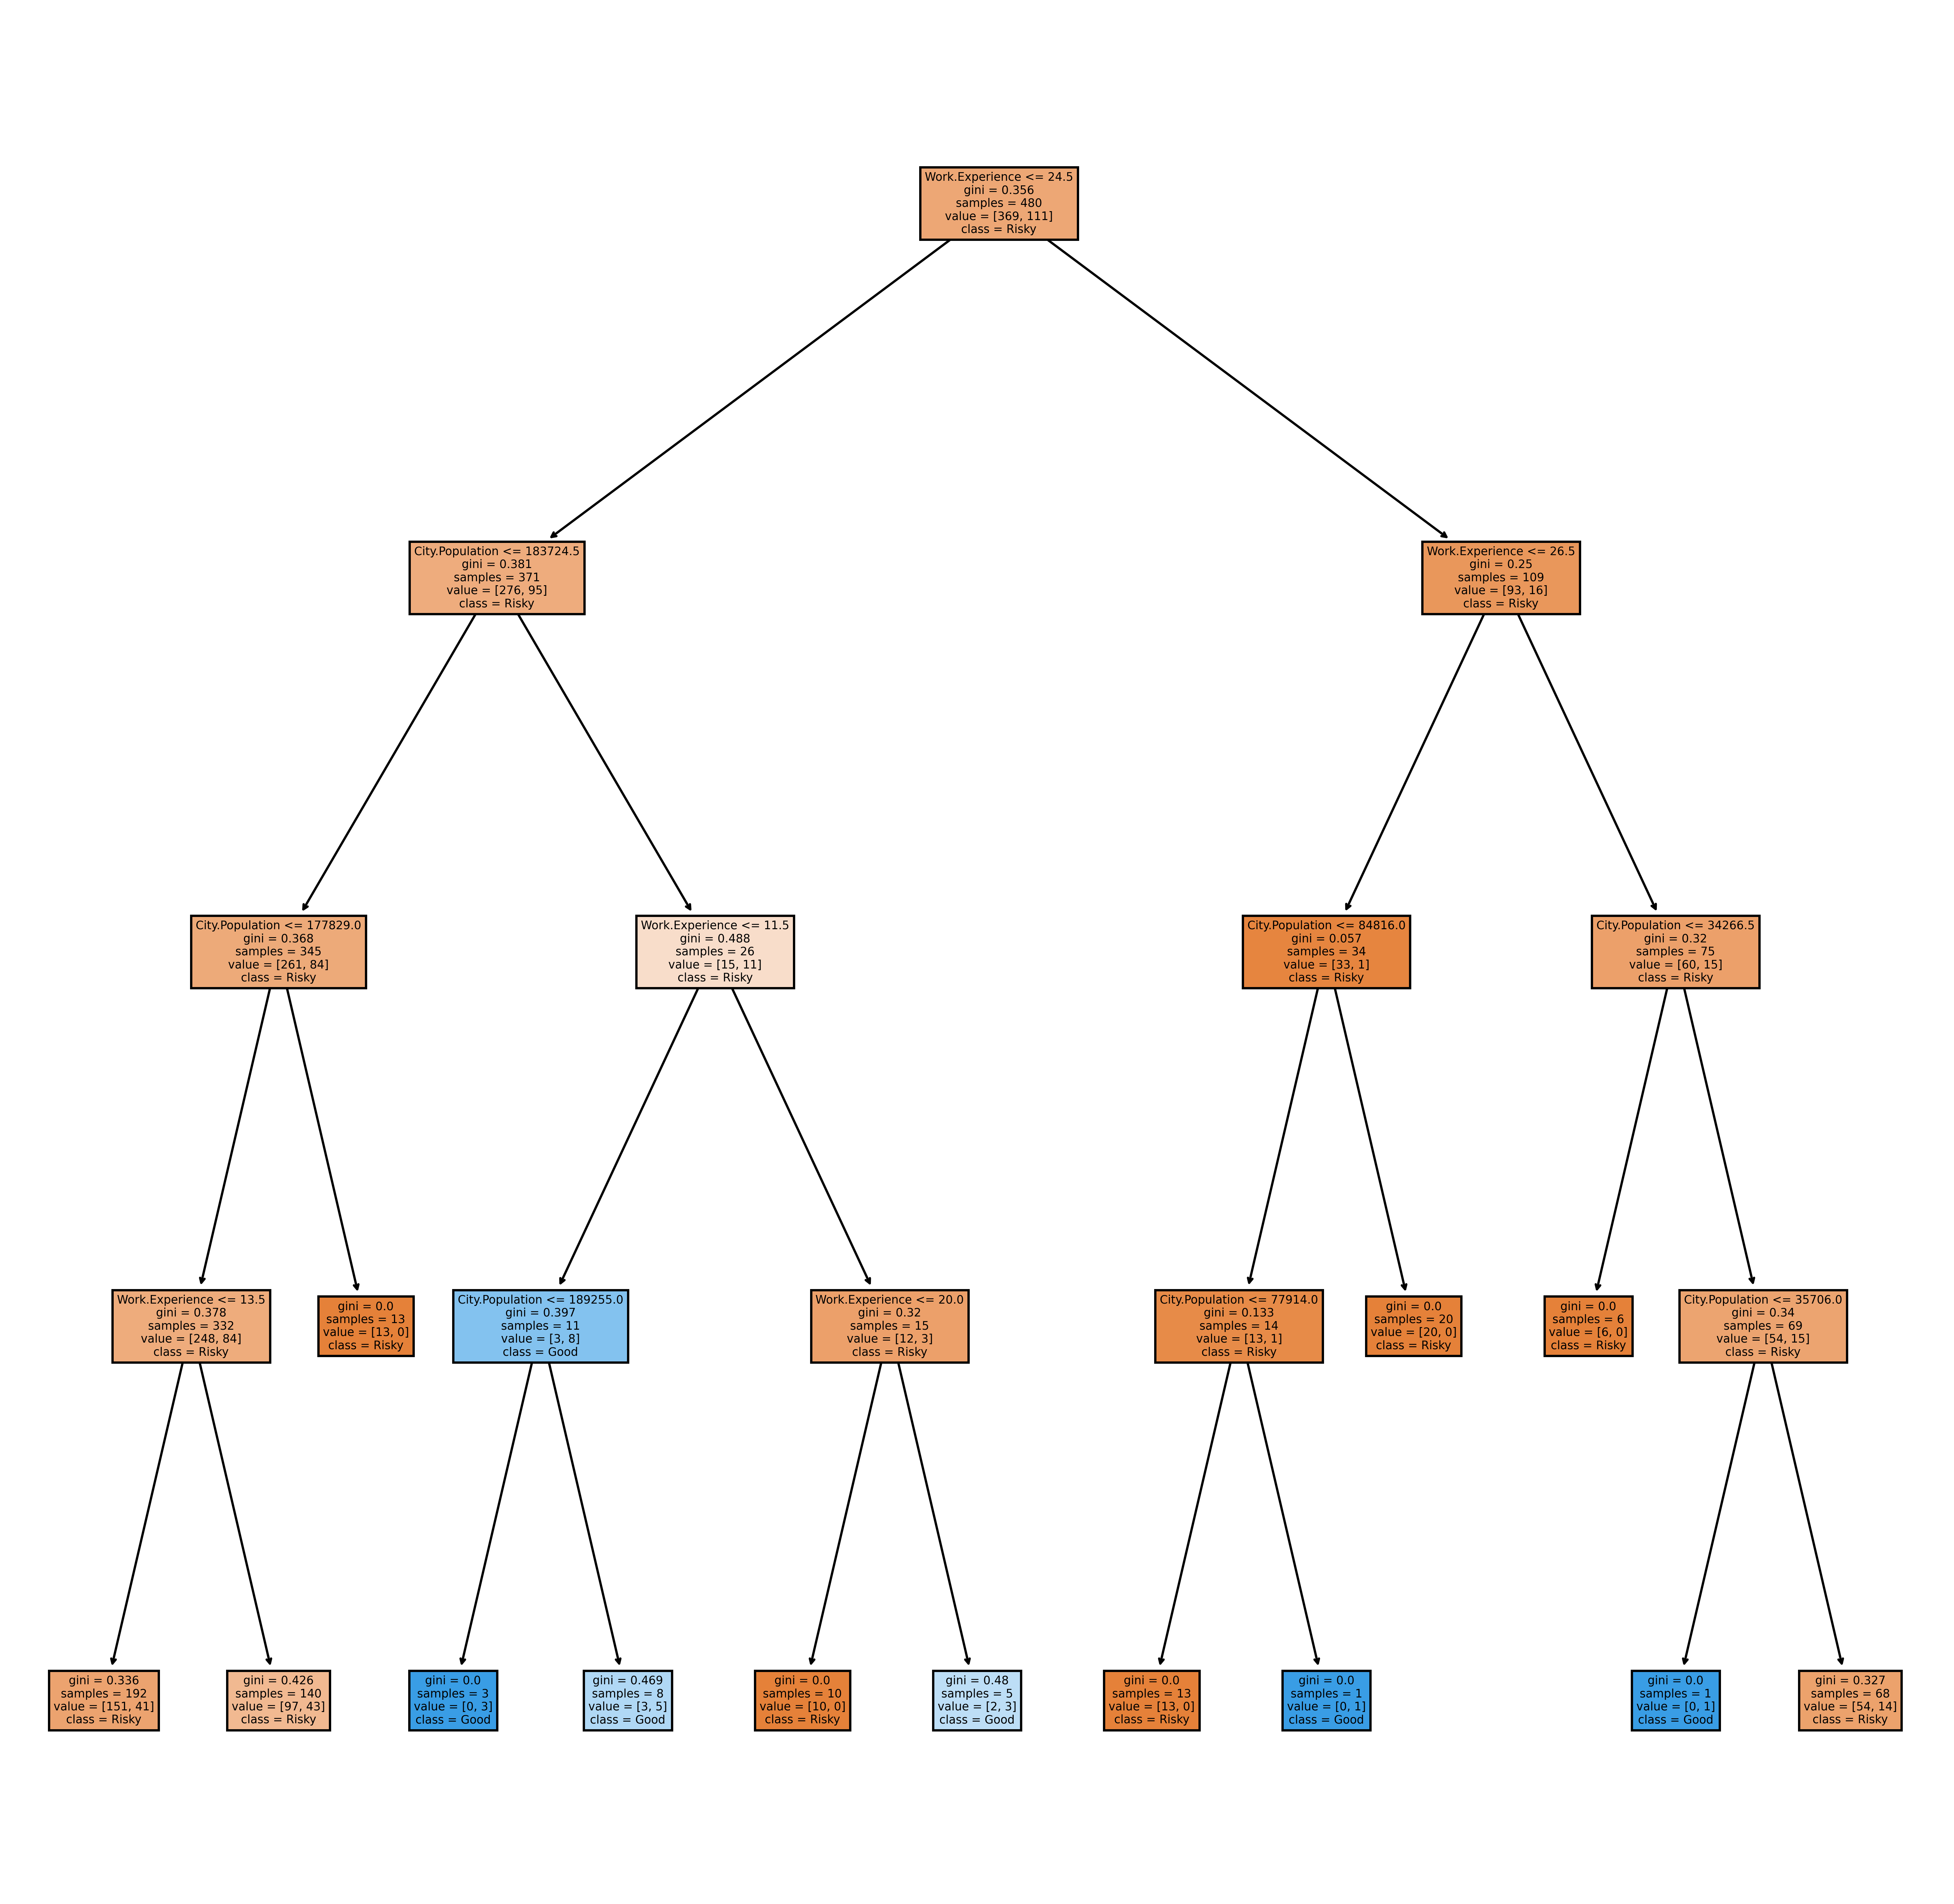

In [52]:
fn =['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience',
       'Urban']
cn =['Risky','Good']
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(15,15),dpi=500)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True)
plt.show()